# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [144]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [145]:
# Load data
url='https://docs.google.com/spreadsheets/d/1-x8hz_KfX4qg-GDp6i4WZzNG9pp7b0KaEO_pJwFGrwU/export?format=csv&gid=2020477971'
df = pd.read_csv(url)

In [146]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [147]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [148]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

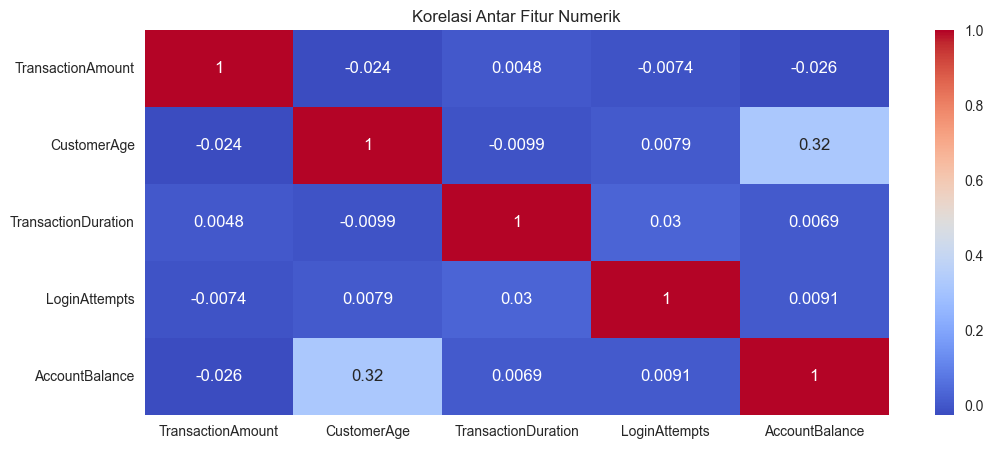

In [149]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 5))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

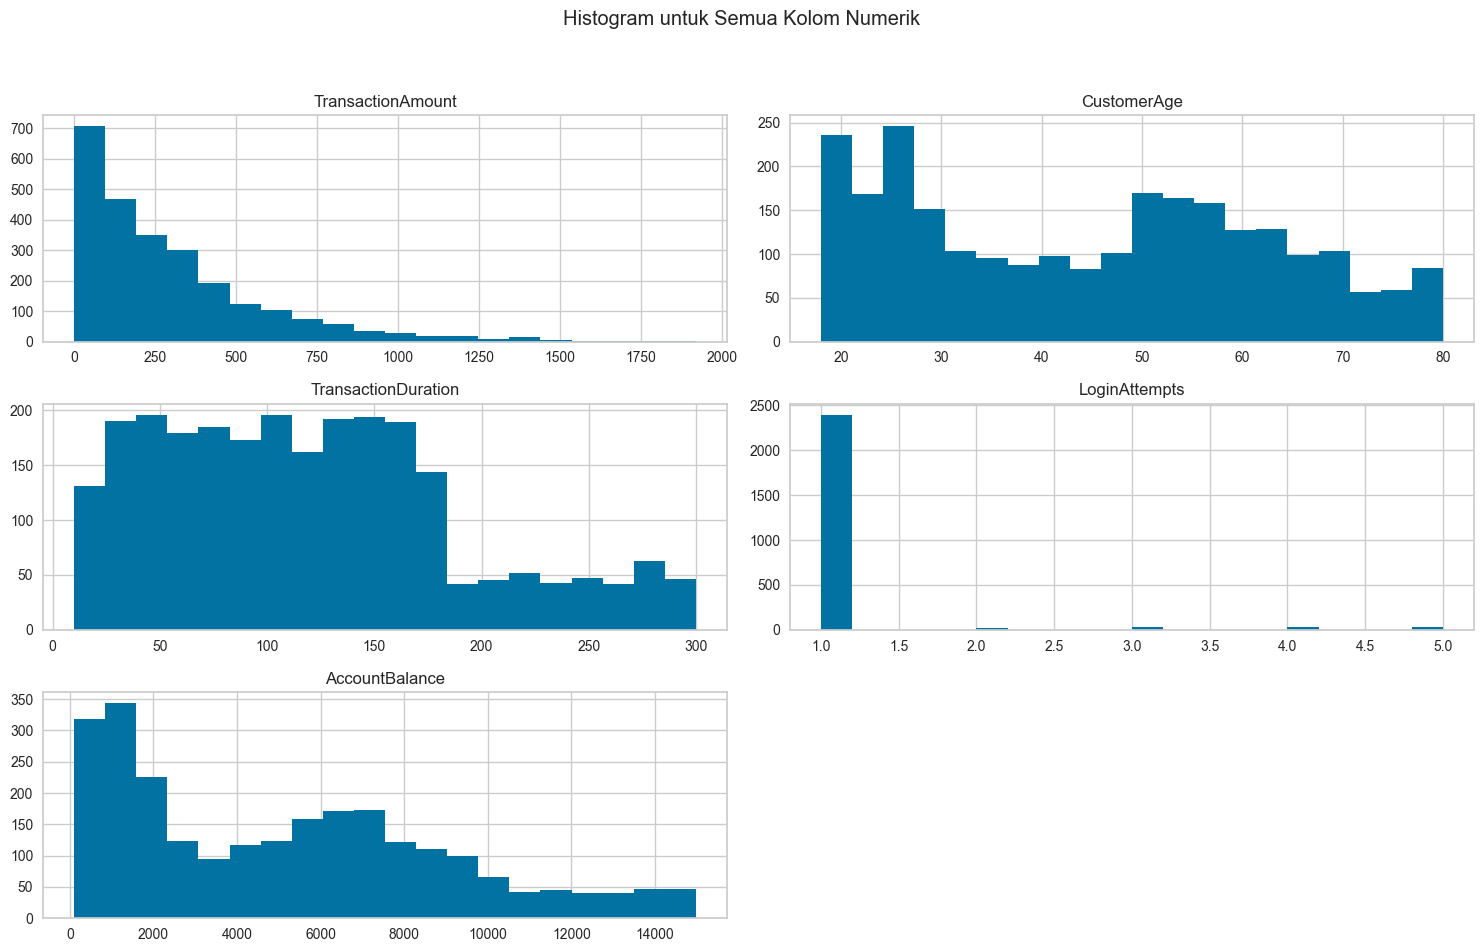

In [150]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numeric_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogram untuk Semua Kolom Numerik')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

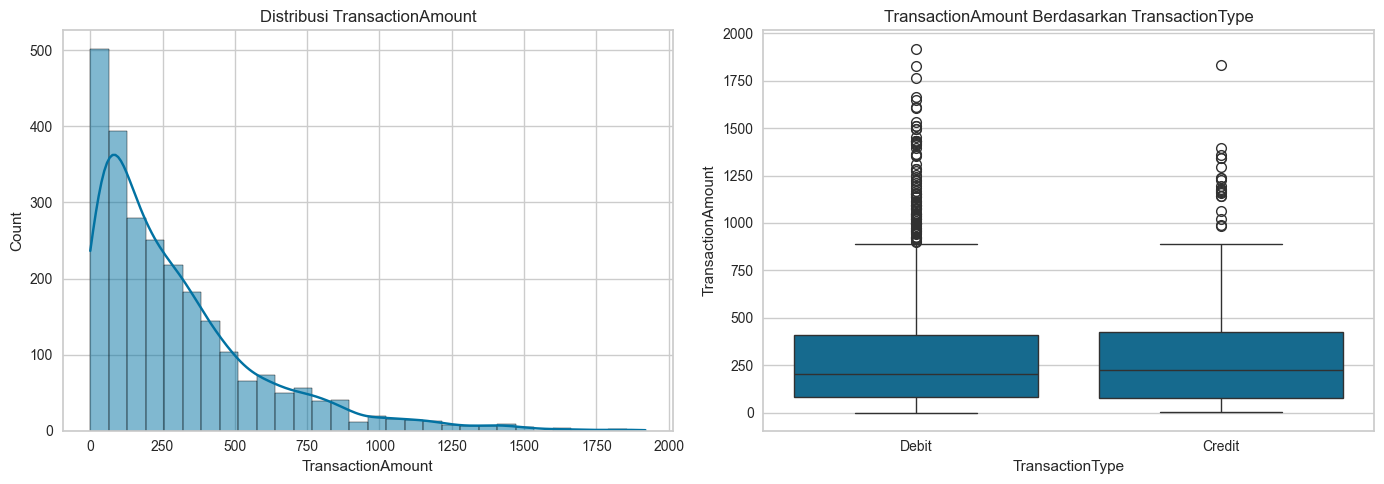

In [151]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(14, 5))

# Distribusi TransactionAmount
plt.subplot(1, 2, 1)
sns.histplot(df['TransactionAmount'], kde=True, bins=30)
plt.title('Distribusi TransactionAmount')

# Box Plot TransactionAmount berdasarkan TransactionType
plt.subplot(1, 2, 2)
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('TransactionAmount Berdasarkan TransactionType')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [152]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [153]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [154]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
minmax = {}
standard = {}

for col in numeric_features:
    minmax[col] = MinMaxScaler()
    df[col] = minmax[col].fit_transform(df[[col]])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [155]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df = df.drop(columns=to_drop)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [156]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

categorical_features = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [157]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [158]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna(subset=['TransactionAmount'])

# menyimpan span transaksi
df['TransactionSpan'] = df['TransactionDate'] - df['PreviousTransactionDate']
df['TransactionSpan'] = pd.to_timedelta(df['TransactionSpan']).dt.days

# drop kolom TransactionDate, PreviousTransactionDate
df['TransactionSpan'] = df['TransactionSpan'].fillna(df['TransactionSpan'].median())
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

# normalisasi
minmax['TransactionSpan'] = MinMaxScaler().fit(df[['TransactionSpan']])
df['TransactionSpan'] = minmax['TransactionSpan'].transform(df[['TransactionSpan']])

# isi kolom umur yang kosong dengan median berdasarkan pekerjaan
df["CustomerAge"] = df.groupby("CustomerOccupation")["CustomerAge"].transform(lambda x: x.fillna(x.median()))

df['LoginAttempts'] = df['LoginAttempts'].fillna(1)

# isi kolom saldo dengan media berdasarkan pekerjaan
df["AccountBalance"] = df.groupby("CustomerOccupation")["AccountBalance"].transform(lambda x: x.fillna(x.median()))

# isi kolom durasi transaksi dengan media
df['TransactionDuration'] = df['TransactionDuration'].fillna(df['TransactionDuration'].median())

df.isnull().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
TransactionSpan        0
dtype: int64

In [159]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [160]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

# Ganti outlier dengan nilai median
df['TransactionAmount'] = np.where(df['TransactionAmount'] > (Q3['TransactionAmount'] + 1.5 * IQR['TransactionAmount']), df['TransactionAmount'].median(), df['TransactionAmount'])

# LoginAttempts ditambahin tanda dan ganti dengan nilai Q3
df['Outlier_Attempts'] = np.where(df['LoginAttempts'] > (Q3['LoginAttempts'] + 1.5 * IQR['LoginAttempts']), 1, 0) 
df['LoginAttempts'] = np.where(df['LoginAttempts'] > (Q3['LoginAttempts'] + 1.5 * IQR['LoginAttempts']), np.round(df['LoginAttempts'].quantile(0.75)), df['LoginAttempts'])

In [161]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# inverse kolom umur
df['AgeGroup'] = pd.cut(minmax['CustomerAge'].inverse_transform(df[['CustomerAge']]).flatten(), bins=[15, 18, 30, 40, 50, 60, 100], labels=['<18', '18-30', '31-40', '41-50', '51-60', '60+'])
display(df['AgeGroup'])
df.isna().sum()

label_encoders['AgeGroup'] = LabelEncoder()
df['AgeGroup'] = label_encoders['AgeGroup'].fit_transform(df['AgeGroup'])

0         60+
1         60+
2       18-30
3       18-30
4       18-30
        ...  
2510    18-30
2511    18-30
2523      60+
2524    31-40
2535    18-30
Name: AgeGroup, Length: 2489, dtype: category
Categories (6, object): ['<18' < '18-30' < '31-40' < '41-50' < '51-60' < '60+']

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [162]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionSpan,Outlier_Attempts,AgeGroup
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.0,2489.000000,2489.000000,2489.000000,2489.000000
mean,0.131861,0.788670,21.324227,1.010044,0.430105,1.530735,0.377414,0.0,0.337113,0.494129,0.055444,2.004821
std,0.110734,0.436866,12.421609,0.830669,0.287004,1.150615,0.240063,0.0,0.261415,0.289782,0.228891,1.616328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.042260,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.094262,0.244505,0.000000,0.000000
50%,0.110014,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.312263,0.489011,0.000000,2.000000
75%,0.188540,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.509286,0.750000,0.000000,3.000000
max,0.470558,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,5.000000


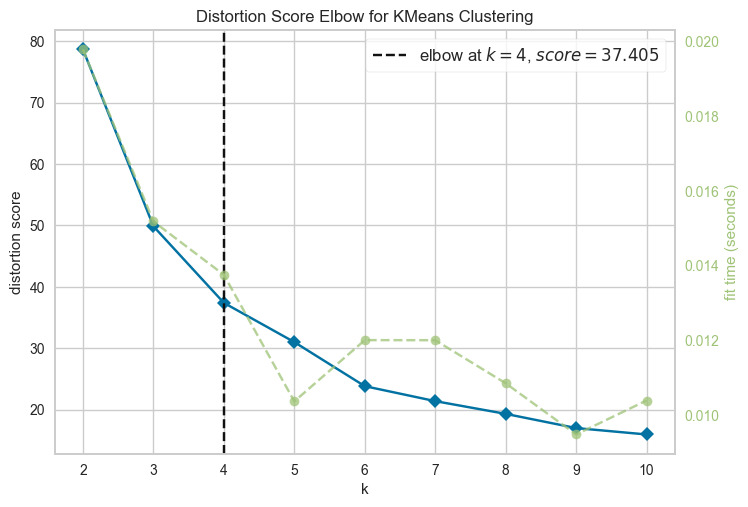

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [163]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df[['TransactionAmount', 'TransactionDuration']].values

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=10)

visualizer.fit(X)

visualizer.show()

In [164]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
df['Target'] = kmeans.predict(X)

Jalankan cell code ini untuk menyimpan model kamu.

In [165]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [166]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(X, df['Target'])
score

np.float64(0.44246109747854995)

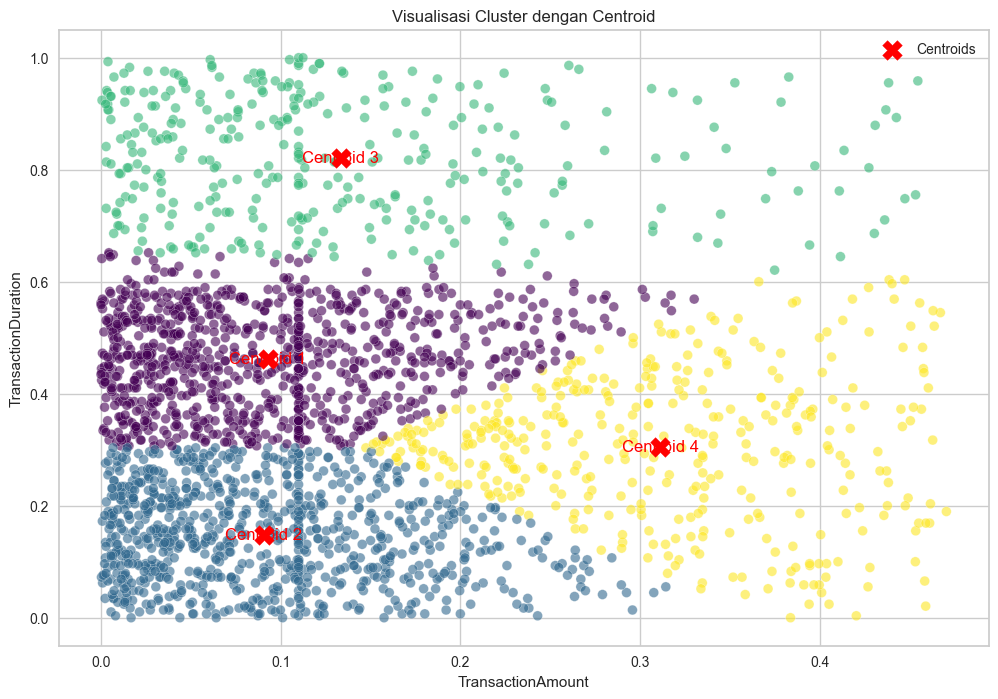

Nilai Centroids:
Centroid 1: TransactionAmount = 0.09, TransactionDuration = 0.46
Centroid 2: TransactionAmount = 0.09, TransactionDuration = 0.15
Centroid 3: TransactionAmount = 0.13, TransactionDuration = 0.82
Centroid 4: TransactionAmount = 0.31, TransactionDuration = 0.31


In [167]:
# Membuat visualisasi hasil clustering
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=df['Target'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('TransactionAmount')
plt.ylabel('TransactionDuration')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: TransactionAmount = {centroid[0]:.2f}, TransactionDuration = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [168]:
# Membangun model menggunakan PCA.
pca_viz =PCA(n_components=2)
df_pca_viz = pca_viz.fit_transform(X)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(data=df_pca_viz, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(PCA_2)

KMeans(n_clusters=4)

In [169]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [170]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
def analyze_result(X, labels):    
    for i in range(4):
        cluster_data = X[labels == i].copy()

        # Fitur Numerik (Mean, Min, Max, Median)
        mean_transaction = cluster_data['TransactionAmount'].mean()
        min_transaction = cluster_data['TransactionAmount'].min()
        max_transaction = cluster_data['TransactionAmount'].max()
        
        mean_account_balance = cluster_data['AccountBalance'].mean()
        min_balance = cluster_data['AccountBalance'].min()
        max_balance = cluster_data['AccountBalance'].max()
        
        mean_duration = cluster_data['TransactionDuration'].mean()
        min_duration = cluster_data['TransactionDuration'].min()
        max_duration = cluster_data['TransactionDuration'].max()
        
        median_age = cluster_data['CustomerAge'].median()
        
        print(f"""
        Cluster-{i+1}
              Mean Transaction: {mean_transaction} (Min: {min_transaction:.2f}, Max: {max_transaction:.2f})
              Mean Balance: {mean_account_balance} (Min: {min_balance:.2f}, Max: {max_balance:.2f})
              Mean duration: {mean_duration} (Min: {min_duration:.2f}, Max: {max_duration:.2f})
              Median Age: {median_age}
        """)

analyze_result(df, kmeans.labels_)


        Cluster-1
              Mean Transaction: 0.09279630632604738 (Min: 0.00, Max: 0.33)
              Mean Balance: 0.34611407206166706 (Min: 0.00, Max: 1.00)
              Mean duration: 0.46284039188459464 (Min: 0.31, Max: 0.65)
              Median Age: 0.467741935483871
        

        Cluster-2
              Mean Transaction: 0.09073214380172978 (Min: 0.00, Max: 0.31)
              Mean Balance: 0.32672252383660466 (Min: 0.00, Max: 0.99)
              Mean duration: 0.14779007724775026 (Min: 0.00, Max: 0.30)
              Median Age: 0.435483870967742
        

        Cluster-3
              Mean Transaction: 0.13341473348981533 (Min: 0.00, Max: 0.45)
              Mean Balance: 0.3340535406020755 (Min: 0.00, Max: 1.00)
              Mean duration: 0.8215847828298241 (Min: 0.62, Max: 1.00)
              Median Age: 0.3870967741935484
        

        Cluster-4
              Mean Transaction: 0.3113873627566725 (Min: 0.15, Max: 0.47)
              Mean Balance: 0.34221147

1. **Cluster 1**: (Nasabah Sedang, Durasi Transaksi Cepat)
- **Rata-rata (mean) Transaction**: 0.0927 (Sangat Rendah)
   - Min-Max Range: 0.00 hingga 0.33
- **Rata-rata (mean) Balance**: 0.3461 (Sedang/Rendah)
   - Min-Max Range: 0.00 hingga 1.00
- **Rata-rata (mean) duration**: 0.4628 (Paling Lama/Sedang Tinggi)
   - Min-Max Range: 0.31 hingga 0.65
- **Median Age**: 0.4677 (Sedang/Rata-rata)
- **Analisis**: Cluster ini memiliki nilai transaksi rata-rata yang sangat rendah, tetapi durasi transaksi rata-ratanya tinggi (kedua tertinggi setelah Cluster 3). Ini mengindikasikan bahwa nasabah di sini menghabiskan waktu relatif lama di sistem untuk transaksi yang bernilai kecil. Profil saldo dan usia mereka rata-rata.

2. **Cluster 2**: (Nasabah Normal, Transaksi Cepat)
- **Rata-rata (mean) Transaction**: 0.0907 (Sangat Rendah)
   - Min-Max Range: 0.00 hingga 0.31
- **Rata-rata (mean) Balance**: 0.3267 (Sedang/Rendah)
   - Min-Max Range: 0.00 hingga 0.99
- **Rata-rata (mean) duration**: 0.1477 (Sangat Cepat/Minimal)
   - Min-Max Range: 0.00 hingga 0.30 (Jangkauan durasi terpendek)
- **Median Age**: 0.4354 (Sedang/Rata-rata)
- **Analisis**: Cluster ini adalah kelompok nasabah dengan nilai transaksi dan saldo rata-rata terendah. Fitur pembeda utamanya adalah durasi transaksi yang sangat cepat, dengan batas maksimum durasi hanya mencapai 0.30. Ini adalah profil tipikal untuk transaksi cepat, rutin, atau otomatis, menjadikannya kelompok yang normal.

3. **Cluster 3**: (Durasi Transaksi Sangat Lambat)
- **Rata-rata (mean) Transaction**: 0.1334 (Rendah)
   - Min-Max Range: Range: 0.00 hingga 0.45
- **Rata-rata (mean) Balance**: 0.3340 (Sedang/Rendah)
   - Min-Max Range: 0.62 hingga 1.00 (Seluruh data berada di rentang durasi tertinggi)
- **Rata-rata (mean) duration**: 0.8215 (Sangat Tinggi/Maksimal)
   - Min-Max Range: 0.00 hingga 0.99
- **Median Age**: 0.3870 (Sedang/Rendah)
- **Analisis**: Cluster ini menunjukkan pola perilaku anomali. Rata-rata durasi transaksinya adalah yang tertinggi, dan seluruh rentang durasinya (min 0.62 hingga max 1.00) berada di ujung ekstrem data yang diskalakan. Ini sangat mengindikasikan sesi yang bermasalah, time-out sistem, atau aktivitas yang sengaja diperpanjang/gagal. Kelompok ini adalah fokus utama untuk deteksi anomali.

4. **Cluster 4**: (Transaktor Tinggi, Profil Sedang)
- **Rata-rata (mean) Transaction**: 0.3113 (Tertinggi)
   - Min-Max Range: 0.15 hingga 0.47 (Min dan Max tertinggi)
- **Rata-rata (mean) Balance**: 0.3422 (Sedang/Rendah)
   - Min-Max Range: 0.00 hingga 1.00
- **Rata-rata (mean) duration**: 0.3053 (Sedang/Cepat)
   - Min-Max Range: 0.00 hingga 0.60
- **Median Age**: 0.4032 (Sedang/Rata-rata)
- **Analisis**: Cluster ini adalah kelompok transaktor dengan nilai tertinggi. Nilai transaksi rata-ratanya jauh melampaui cluster lain, dan yang paling krusial, nilai minimum transaksinya (0.15) lebih tinggi daripada rata-rata transaksi cluster lainnya. Ini berarti hampir semua transaksi di sini bernilai besar. Meskipun saldonya hanya rata-rata, kelompok ini adalah yang paling bernilai dalam hal volume transaksi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [171]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target']

0       1
1       0
2       1
3       1
4       0
       ..
2510    1
2511    1
2523    1
2524    1
2535    1
Name: Target, Length: 2489, dtype: int32

In [172]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [173]:
# inverse dataset ke rentang normal untuk numerikal
df_inversed = df.copy()
for key, scaler in minmax.items():
  df_inversed[key] = scaler.inverse_transform(df[[key]])
# tampilkan dataset yang sudah di-inverse
df_inversed.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionSpan,Outlier_Attempts,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,572.0,0,4,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,495.0,0,4,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,482.0,0,0,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,548.0,0,0,1
4,13.45,0,1,2,23.0,3,198.0,1.0,7429.40,384.0,0,0,0


In [174]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for key, encoder in label_encoders.items():
    df_inversed[key] = encoder.inverse_transform(df[key])
# tampilkan dataset yang sudah di-inverse
df_inversed.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionSpan,Outlier_Attempts,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,572.0,0,60+,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,495.0,0,60+,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,482.0,0,18-30,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,548.0,0,18-30,1
4,13.45,Credit,Atlanta,Online,23.0,Student,198.0,1.0,7429.40,384.0,0,18-30,0


In [175]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
def analyze_result_inversed(X, labels):
    for i in range(4):
        cluster_data = X[labels == i].copy()

        # Fitur Numerik (Mean, Min, Max, Median)
        mean_transaction = cluster_data['TransactionAmount'].mean()
        min_transaction = cluster_data['TransactionAmount'].min()
        max_transaction = cluster_data['TransactionAmount'].max()
        
        mean_account_balance = cluster_data['AccountBalance'].mean()
        min_balance = cluster_data['AccountBalance'].min()
        max_balance = cluster_data['AccountBalance'].max()
        
        mean_duration = cluster_data['TransactionDuration'].mean()
        min_duration = cluster_data['TransactionDuration'].min()
        max_duration = cluster_data['TransactionDuration'].max()
        
        median_age = cluster_data['CustomerAge'].median()
        
        # Fitur Kategorikal/Encoded (Mode)
        mode_channel = cluster_data['Channel'].mode()[0]
        mode_occupation = cluster_data['CustomerOccupation'].mode()[0]
        
        try:
            mode_transaction_type = cluster_data['TransactionType'].mode()[0]
        except KeyError:
            mode_transaction_type = 'N/A' # Handle jika kolom tidak ada
            
        try:
            mode_location = cluster_data['Location'].mode()[0]
        except KeyError:
            mode_location = 'N/A' # Handle jika kolom tidak ada

        print(f"""
        Cluster-{i+1}
        
              --- Numerik ---
              Mean Transaction: {mean_transaction:.2f} (Min: {min_transaction:.2f}, Max: {max_transaction:.2f})
              Mean Balance: {mean_account_balance:.2f} (Min: {min_balance:.2f}, Max: {max_balance:.2f})
              Mean duration: {mean_duration:.2f} (Min: {min_duration:.2f}, Max: {max_duration:.2f})
              Median Age: {median_age:.1f}
              
              --- Kategorikal (Mode) ---
              Mode Transaction Type: {mode_transaction_type}
              Mode Channel: {mode_channel}
              Mode Location: {mode_location}
              Mode Occupation: {mode_occupation}
        """)

analyze_result_inversed(df_inversed, kmeans.labels_)


        Cluster-1
        
              --- Numerik ---
              Mean Transaction: 178.32 (Min: 0.26, Max: 633.87)
              Mean Balance: 5250.30 (Min: 112.76, Max: 14942.78)
              Mean duration: 144.22 (Min: 99.00, Max: 199.00)
              Median Age: 47.0
              
              --- Kategorikal (Mode) ---
              Mode Transaction Type: Debit
              Mode Channel: Branch
              Mode Location: San Antonio
              Mode Occupation: Doctor
        

        Cluster-2
        
              --- Numerik ---
              Mean Transaction: 174.36 (Min: 0.84, Max: 603.54)
              Mean Balance: 4961.82 (Min: 101.25, Max: 14829.85)
              Mean duration: 52.86 (Min: 10.00, Max: 98.00)
              Median Age: 45.0
              
              --- Kategorikal (Mode) ---
              Mode Transaction Type: Debit
              Mode Channel: Branch
              Mode Location: Fort Worth
              Mode Occupation: Student
       

1. **Cluster 1**: (Nasabah Profesional Premium, Durasi Cabang Tertinggi)
- **Rata-rata (mean) Transaction**: 178.32 (Rendah)
   - **Min-Max Range**: $0.26 hingga $633.87
- **Rata-rata (mean) Balance**: 5250.30 (Tertinggi)
   - Min-Max Range: $112.76 hingga $14942.78 (Jangkauan Max yang Tinggi)
- **Rata-rata (mean) duration**: 144.22 detik (Paling Lama/Tertinggi)
   - Min-Max Range: 99.00 hingga 199.00 detik (Jangkauan ketat di durasi tinggi)
- **Modus Occupation**: Doctor
- **Mode Channel**: Branch
- **Analisis**: Cluster ini memiliki saldo akun tertinggi dan didominasi oleh nasabah profesional (Doctor). Transaksi mereka memiliki durasi rata-rata yang paling lama. Kombinasi Branch sebagai kanal dominan dan durasi yang sangat tinggi menunjukkan transaksi yang kompleks atau memerlukan asistensi dan validasi fisik. Meskipun transaksi per sekali jalan rendah, ini adalah kelompok nasabah premium.

2. **Cluster 2**: (Nasabah Baru/Mahasiswa, Transaksi Minimal & Cepat)
- **Rata-rata (mean) Transaction**: 174.36 (Terendah)
   - **Min-Max Range**: $0.84 hingga $603.54
- **Rata-rata (mean) Balance**: 4961.82 (Terendah)
   - Min-Max Range: $101.25 hingga $14829.85
- **Rata-rata (mean) duration**: 52.86 detik (Sangat Cepat/Tercepat)
   - Min-Max Range: 10.00 hingga 98.00 detik
- **Modus Occupation**: Student
- **Mode Channel**: Branch
- **Analisis**: Cluster ini adalah kelompok nasabah dengan profil finansial paling minimal (saldo dan nilai transaksi terendah) dan didominasi oleh pelajar/mahasiswa. Mereka cenderung melakukan transaksi yang sangat cepat (durasi terendah) meskipun melalui kanal Branch. Kelompok ini adalah target untuk produk perbankan dasar dan layanan digital.

3. **Cluster 3**: (Nasabah ATM/Online, Durasi Lama)
- **Rata-rata (mean) Transaction**: 256.26 (Sedang)
   - Min-Max Range: $1.41 hingga $872.72
- **Rata-rata (mean) Balance**: 5070.88 (Rendah)
   - Min-Max Range: 190.00 hingga 300.00 detik (Seluruh data berada di rentang durasi tertinggi)
- **Rata-rata (mean) duration**: 248.26 detik (Durasi Anomali/Sangat Tinggi)
- **Modus Occupation**: Student
- **Mode Channel**: ATM
- **Analisis**: Cluster ini sangat unik karena memiliki durasi transaksi yang anomali/sangat tinggi (248 detik) pada kanal ATM. Nilai transaksi mereka sedikit di atas rata-rata. Durasi yang tidak normal ini, terutama melalui ATM, mungkin mengindikasikan time-out sistem, masalah jaringan, atau upaya transaksi yang berulang/mencurigakan. Kelompok ini patut diwaspadai untuk deteksi anomali.

4. **Cluster 4**: (Nasabah High-Value, Transaksi Terbesar)
- **Rata-rata (mean) Transaction**: 597.77 (Tertinggi)
   - Min-Max Range: 283.23 hingga 903.19 (Batas Min transaksi sudah sangat tinggi)
- **Rata-rata (mean) Balance**: 5192.24 (Sedang/Tinggi)
   - Min-Max Range: 102.20 hingga 14977.99 (Rentang yang sangat luas)
- **Rata-rata (mean) duration**: 98.56 detik (Cepat)
   - Min-Max Range: 10.00 hingga 185.00 detik
- **Modus Occupation**: Student
- **Mode Channel**: ATM
- **Analisis**: Cluster ini didominasi oleh transaksi dengan nilai rata-rata tertinggi (597.77), menandakannya sebagai kelompok high-volume transactors. Menariknya, mereka cenderung mahasiswa dan menggunakan ATM, namun durasi transaksinya cepat. Meskipun nilai transaksinya tinggi, saldo akun mereka hanya sedang, menyiratkan bahwa mereka membelanjakan atau memindahkan sebagian besar dana mereka. Kelompok ini merupakan kelompok yang paling bernilai dalam hal volume uang yang mengalir.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [176]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = kmeans.labels_

In [177]:
# Simpan Data
df_inversed.to_csv('data_clustering_inverse.csv', index=False)

End of Code.